## Code for making plots

In [1]:
!uv pip install pandas matplotlib

Audited 2 packages in 10ms


In [2]:
# I put this through ChatGPT to clean it up
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle

### Read and merge the data

In [3]:
# Importing and reading depmap data
dmeta = pd.read_csv("depmap_meta.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
ge = pd.read_csv("depmap_GE_scaled.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
gd = pd.read_csv("depmap_GD.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
tf = pd.read_csv("depmap_TF Activity.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
# kocak data
kmeta = pd.read_csv("KOCAK_meta.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
kge = pd.read_csv("KOCAK_GE_scaled.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
ktf = pd.read_csv("KOCAK_TF Activity.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})
sur = pd.read_csv("KOCAK_survival.txt", delimiter = '	').rename(columns={"Unnamed: 0" : "condition"})

In [4]:
kge
# ge

,condition,X15E1.2,X2..PDE,X3.8.1,X36951,X37226,X37316,X37347,X37681,X38047,...,ZWILCH,ZWINT,ZWINTAS,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,P252038210001_1_2,1.231410,3.138625,-0.718442,-0.215222,-0.423496,-1.303876,-0.904978,-1.156956,-3.381581,...,-0.521422,0.593699,-0.337839,0.054762,2.476203,2.299123,0.682733,0.333923,-0.419100,3.352009
1,P252038210005_1_2,-1.620738,1.714442,0.181632,1.453919,-0.299060,-1.872659,0.022713,-0.262885,0.128789,...,0.937021,1.055259,-0.544246,0.736159,1.181370,-0.530573,-1.574395,-0.204415,0.551112,-0.442007
2,P252038210005_1_4,-0.567389,0.610350,0.651563,-0.533787,-1.121181,0.457299,0.479539,0.687667,-1.644008,...,-1.193777,-0.964513,-0.548252,0.400134,-0.251091,-0.505050,-1.991503,0.445994,0.706595,-1.950110
3,P252038210011_1_2,-0.261975,0.263111,0.430756,1.002556,0.700344,-0.626848,0.676822,1.734791,-1.271482,...,0.893952,0.739294,-0.365909,0.033651,-0.858694,-0.611231,0.734457,0.533528,-0.784322,-1.463848
4,P252038210011_1_4,-0.888105,-0.028747,0.394340,1.184762,1.535490,1.602909,1.566630,1.777807,-0.420834,...,-1.102737,-2.617997,-0.469440,-1.041791,-3.418359,-0.568963,1.246320,0.838788,-2.122348,-2.135471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,P252038210171_1_3,-0.746278,-0.132453,0.669301,0.295717,-0.383505,-0.402127,-1.968859,0.783893,0.726054,...,0.714732,-0.055668,-0.333016,-0.915724,-0.476991,-0.600321,0.745150,-0.046361,-0.252702,0.479190
471,P252038210173_1_1,-0.205088,-1.059512,0.668197,0.051166,0.898137,0.529314,1.289649,1.528054,-0.662202,...,-2.384215,-2.891573,-0.311618,0.743918,0.684830,-0.374936,0.742863,0.445635,-1.422632,-0.208087
472,P252038210173_1_2,-0.406605,-0.757941,0.805290,0.680369,0.966243,0.868643,-0.594761,0.393029,-0.667730,...,-0.267741,-0.878627,0.144231,0.180473,-0.138528,-0.570535,0.829127,-0.097997,0.547236,0.544007
473,P252038210173_1_3,-0.537150,-0.075566,0.813601,0.064549,-0.273241,0.724727,0.100532,-0.084992,0.653010,...,0.798354,0.301763,-0.544638,0.535456,0.888755,-0.499932,-0.300670,0.257415,0.464354,-0.783596


In [5]:
sur

,condition,EFS_d,EFS_bin,OS_d,OS_bin
0,P252038210001_1_2,323,1,487,1
1,P252038210005_1_2,1077,0,1077,0
2,P252038210005_1_4,161,1,209,1
3,P252038210011_1_2,685,1,760,1
4,P252038210011_1_4,2761,0,2761,0
...,...,...,...,...,...
471,P252038210171_1_3,2852,0,2852,0
472,P252038210173_1_1,519,1,535,1
473,P252038210173_1_2,1001,0,1001,0
474,P252038210173_1_3,150,0,150,0


### Functions to create plots from tfs inserted

In [6]:
dep_features = {"condition":"Cell line", "GE":ge, "GD": gd, "TF":tf} # dictionary of features from the depmap database
ko_features = {"condition": "Patient ID","GE":kge, "TF":ktf}
#depmap = {"GE":meta_gesn, "GD": meta_gdsn, "TF": meta_tfsn}

In [7]:
def merge_one(meta, feature_set, tf):
    col_list = meta.columns.tolist()
    col_list.append(tf)
    meta_set = pd.merge(meta, feature_set, how='right', on='condition')
    merged = meta_set[[col for col in col_list]]
    return merged

dep_features = {"condition": "Cell line", "GE": ge, "GD": gd, "TF": tf}
ko_features = {"condition": "Patient ID", "GE": kge, "TF": ktf}

In [8]:
def get_dictionary(database):
    if database.lower() == "depmap":
        return dep_features
    elif database.lower() == "kocak":
        return ko_features
    else:
        print("Try again with a valid database")
        return None

In [9]:
def merge_sort(feature, tf, database):
    dictionary = get_dictionary(database)
    if dictionary is None:
        return None

    if database.lower() == "depmap":
        meta = dmeta
    elif database.lower() == "kocak":
        meta = kmeta
    else:
        print("Try again with a valid database")
        return None

    mset = merge_one(meta, dictionary[feature], tf)
    set_sorted = mset.sort_values(by=[tf])
    return set_sorted

colours0 = {"<0": "#C00000", ">0": "#30CE47"}
hatches0 = {"<0": "", ">0": "/"}



#### Bar plot highlighting >0 or <0 status

In [33]:
def bar_plot_0(feature, tf, database):
    set_sorted = merge_sort(feature, tf, database)
    if set_sorted is None:
        return

    tf_name = str(tf)
    feat_name = str(feature)
    title = f"{feat_name} for {tf_name} ({database.upper()})"
    ylabel = f"{tf_name} {feat_name} (scaled)"
    
    ax = set_sorted.plot.bar(x='condition', y=tf, xlabel=get_dictionary(database)["condition"], ylabel=ylabel, title=title,
                            color=np.where(set_sorted[tf] > 0, colours0['>0'], colours0['<0']), 
                            hatch=np.where(set_sorted[tf] > 0, hatches0['>0'], hatches0['<0'])
                           )
    ax.legend(
        [
            Patch(facecolor=colours0['<0'], hatch=hatches0['<0']),
            Patch(facecolor=colours0['>0'], hatch=hatches0['>0'])
        ], [f"{feature.upper()}<0", f"{feature.upper()}>0"]
    )
    plt.show()

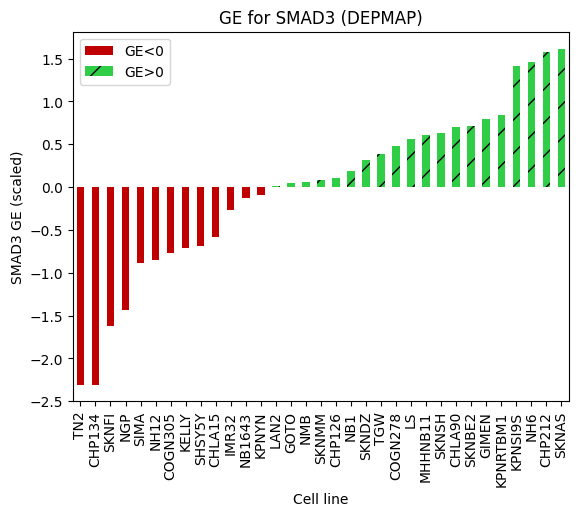

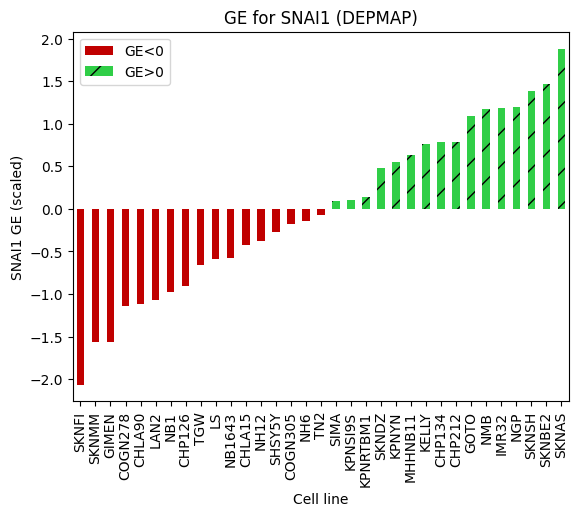

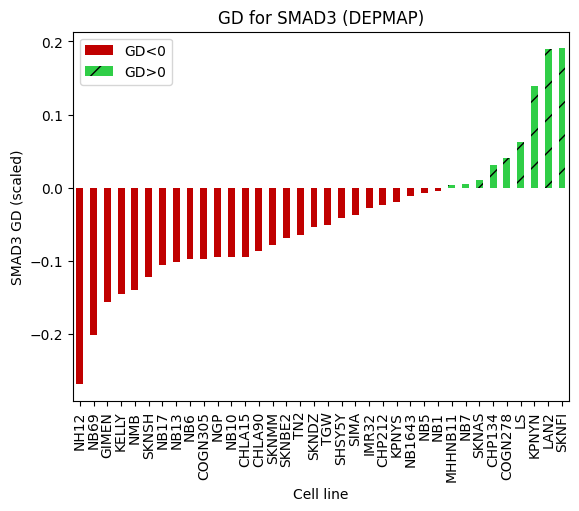

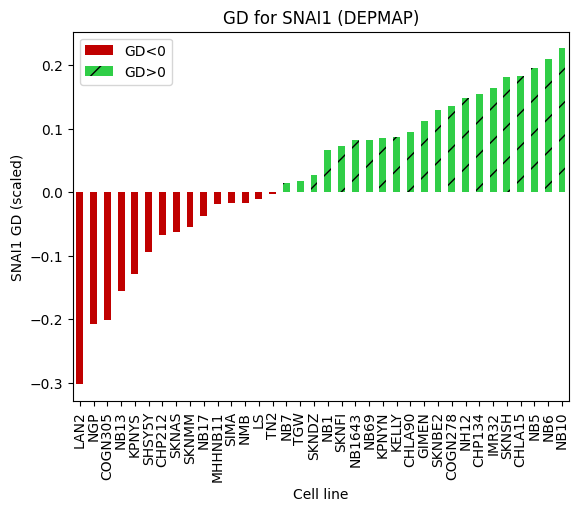

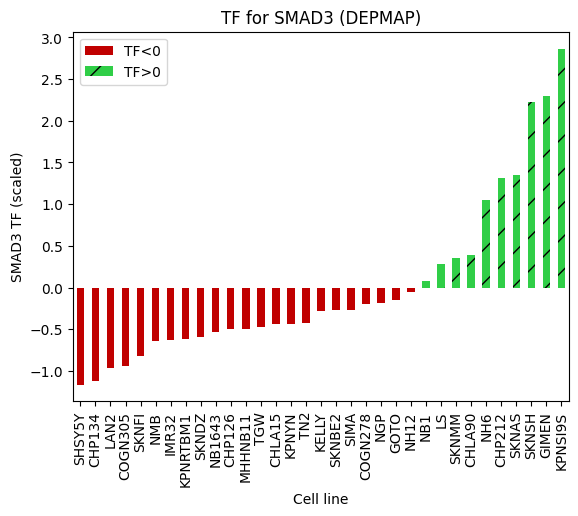

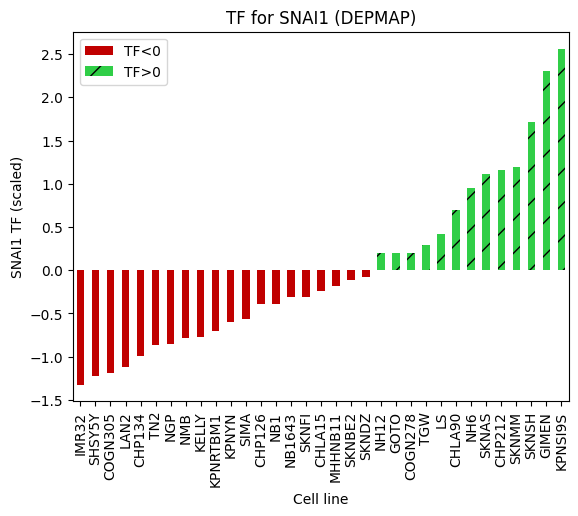

In [34]:
# DEPMAP
for feature in ["GE", "GD", "TF"]:
    for tf in ["SMAD3", "SNAI1"]:
        bar_plot_0(feature, tf, "depmap")

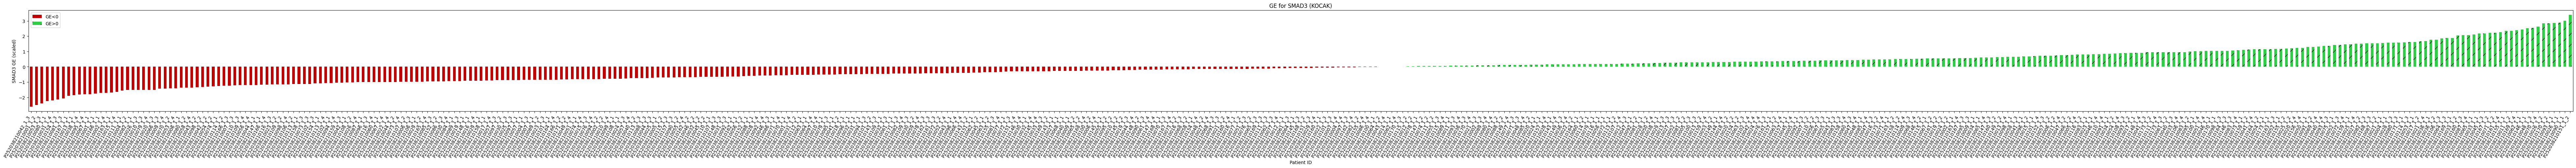

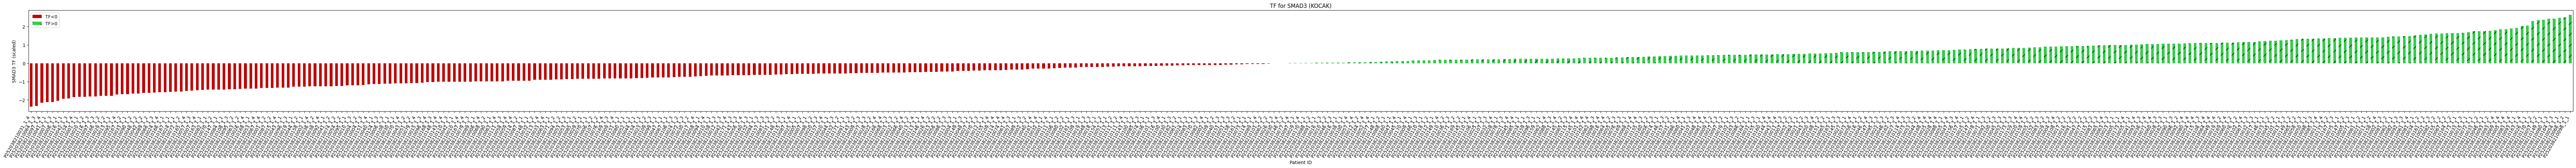

In [49]:
# How to KOCAK?
def bar_plot_1(feature, tf, database):
    set_sorted = merge_sort(feature, tf, database)
    if set_sorted is None:
        return
        
    tf_name = str(tf)
    feat_name = str(feature)
    title = f"{feat_name} for {tf_name} ({database.upper()})"
    ylabel = f"{tf_name} {feat_name} (scaled)"

    ax = set_sorted.plot.bar(
        x='condition', y=tf, xlabel=get_dictionary(database)["condition"], ylabel=ylabel, title=title,
                            color=np.where(set_sorted[tf] > 0, colours0['>0'], colours0['<0']), 
                            hatch=np.where(set_sorted[tf] > 0, hatches0['>0'], hatches0['<0']),
                            figsize=(100, 4),
                           )
    ax.legend(
        [
            Patch(facecolor=colours0['<0'], hatch=hatches0['<0']),
            Patch(facecolor=colours0['>0'], hatch=hatches0['>0'])
        ], [f"{feature.upper()}<0", f"{feature.upper()}>0"]
    )
    plt.xticks(rotation=60, ha='right')
    plt.show()

# KOCAK
for feature in ["GE", "TF"]:
    for tf in ["SMAD3"]:
        bar_plot_1(feature, tf, "kocak")